In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, UpSampling2D,InputLayer, DepthwiseConv2D, Flatten, MaxPooling2D, Conv2DTranspose, AveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
from tensorflow.keras.utils import plot_model
from math import ceil
import cv2
from skimage import io, color
import random

In [2]:
rootdir = os.getcwd()
filenames = (os.listdir('images'))


In [19]:
lspace =[]
abspace = []
for file in filenames:
    rgb = io.imread('images/' + str(file))
    lab_image = cv2.cvtColor(rgb,cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    lspace.append(l_channel)
    replot_lab = np.zeros((128,128,2))
    replot_lab[:,:,0]= a_channel
    replot_lab[:,:,1] = b_channel
    abspace.append(replot_lab)
    transfer = cv2.merge([l_channel,a_channel,b_channel])
    transfer = cv2.cvtColor(transfer.astype(np.uint8),cv2.COLOR_LAB2BGR)
lspace = np.asarray(lspace)
abspace = np.asarray(abspace)

In [20]:
X = lspace
y = abspace

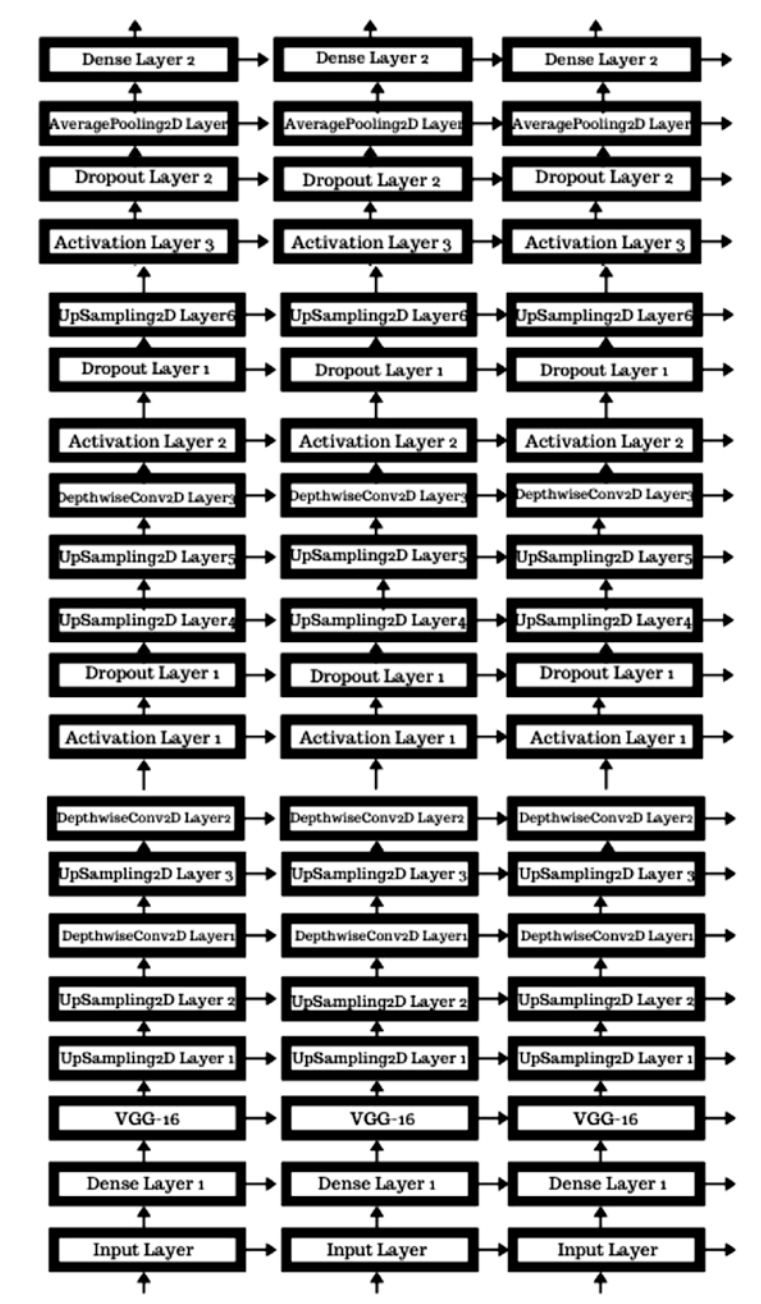

In [25]:
model6 = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3))
model = Sequential()
model.add(InputLayer(input_shape = (X.shape[1], X.shape[2], 1)))
model.add(layers.Dense(units = 3))
model.add(Model(inputs = model6.inputs, outputs = model6.layers[-10].output))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(DepthwiseConv2D(32,(2,2),activation = 'tanh',padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(DepthwiseConv2D(32,(2,2),activation = 'tanh',padding = 'same'))
model.add(layers.ReLU(0.3))
model.add(layers.Dropout(0.4))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(DepthwiseConv2D(32,(2,2),activation = 'tanh',padding = 'same'))
model.add(layers.ReLU(0.3))
model.add(layers.Dropout(0.2))
model.add(UpSampling2D((2,2)))
model.add(layers.ReLU(0.3))
model.add(layers.Dropout(0.2))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(layers.Dense(units=2))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128, 128, 3)       6         
                                                                 
 model_2 (Functional)        (None, 32, 32, 256)       1735488   
                                                                 
 up_sampling2d_6 (UpSampling  (None, 64, 64, 256)      0         
 2D)                                                             
                                                                 
 up_sampling2d_7 (UpSampling  (None, 128, 128, 256)    0         
 2D)                                                             
                                                                 
 depthwise_conv2d_4 (Depthwi  (None, 64, 64, 256)      262400    
 seConv2D)                                                       
                                                      

In [27]:
def adam_optimizer():
    return Adam(learning_rate=0.001, beta_1 = 0.99, beta_2 = 0.999)
model.compile(loss= 'mape', optimizer = adam_optimizer())

In [28]:
X =((X.reshape(X.shape[0],X.shape[1],X.shape[2],1)))
X = (X-255)/ 255
y = (y-255)/255

trainsize = ceil(0.8* X.shape[0])
testsize = ceil(0.2*X.shape[0])+1

train_inp = X[:trainsize,]
test_inp = X[testsize:,]

train_out = y[:trainsize,]
test_out = y[testsize:,]

In [ ]:
model.fit(x = train_inp, y = train_out, batch_size = 32, epochs = 5)

Epoch 1/5


In [ ]:
train_pred = model.predict(train_inp)
test_pred = model.predict(test_inp)

train_random = random.randint(1,trainsize)
test_random = random.randint(1,testsize)

check = np.interp(train_pred, (train_pred.min(), train_pred.max()), (0,255))
check1 = np.interp(test_pred, (test_pred.min(), test_pred.max()), (0,255))

l_channel = test_inp[20]*255
a_channel = check1[20,:,:,0]
b_channel = check1[20,:,:,1]

trainsfer = cv2.merge([l_channerl,a_channel, b_channel])
trainsfer = cv2.cvtColor(transfer.astype(np.uint8), cv2.COLOR_LAB2BGR)

In [ ]:
plt.imshow(transfer)